# Capstone Two - Data Wrangling

The dataset used was the 2017 National Household Travel Survey. This notebook will focus on the cleaning the data.

## Import packages

In [1]:
#import packages
import pandas as pd
import os
import tabula
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Set directories

In [2]:
os.chdir("..")
cw = os.getcwd()

## Read datasets

The National Household Travel Survey has 4 datasets. 

1. The Person dataset 
2. The Household dataset
3. The Vehicle dataset
4. The Travel dataset

In [3]:
#import person data
data_person=pd.read_sas(os.path.join(cw,'Data/sas/perpub.sas7bdat'), format = 'sas7bdat', encoding="ISO-8859-1")

/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/pandas/io/sas/sas7bdat.py:809: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._string_chunk[js, :]
/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/pandas/io/sas/sas7bdat.py:800: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._byte_chunk[jb, :].view(dtype=self.byte_order + "d")


In [4]:
#Look at first few rows
data_person.head()

,HOUSEID,PERSONID,R_AGE,EDUC,R_HISP,R_RELAT,R_SEX,R_RACE,PRMACT,PAYPROF,...,SMPLSRCE,WTPERFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
0,30000007,01,67.0,03,02,01,02,02,06,02,...,02,206.690153,T,50,1500,750,750,20,750,300
1,30000007,02,66.0,03,02,02,01,02,01,-1,...,02,197.075742,T,50,1500,750,750,20,750,300
2,30000007,03,28.0,02,02,03,02,02,05,02,...,02,219.514210,T,50,1500,750,750,20,750,300
3,30000008,01,55.0,05,02,01,01,01,01,-1,...,02,63.185911,R,05,300,300,150,05,300,300
4,30000008,02,49.0,04,02,02,02,01,01,-1,...,02,58.665911,R,05,300,300,150,05,300,300


In [5]:
#Looks at dimension
data_person.shape

(264234, 121)

In [6]:
#Look at data info
data_person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264234 entries, 0 to 264233
Columns: 121 entries, HOUSEID to HBRESDN
dtypes: float64(31), object(90)
memory usage: 243.9+ MB


In [7]:
#Select string variables
data_person_obj = data_person.select_dtypes(['object'])
print (data_person_obj.head())

    HOUSEID PERSONID EDUC R_HISP R_RELAT R_SEX R_RACE PRMACT PAYPROF GT1JBLWK  \
0  30000007       01   03     02      01    02     02     06      02       -1   
1  30000007       02   03     02      02    01     02     01      -1       02   
2  30000007       03   02     02      03    02     02     05      02       -1   
3  30000008       01   05     02      01    01     01     01      -1       02   
4  30000008       02   04     02      02    02     01     01      -1       02   

   ... HH_CBSA SMPLSRCE HBHUR HTHTNRNT HTPPOPDN HTRESDN HTEEMPDN HBHTNRNT  \
0  ...   XXXXX       02     T       50     1500     750      750       20   
1  ...   XXXXX       02     T       50     1500     750      750       20   
2  ...   XXXXX       02     T       50     1500     750      750       20   
3  ...   33460       02     R       05      300     300      150       05   
4  ...   33460       02     R       05      300     300      150       05   

  HBPPOPDN HBRESDN  
0      750     300  
1      7

In [8]:
#Remove trailing or leading spaces
data_person[data_person_obj.columns] = data_person_obj.apply(lambda x: x.str.strip())

In [9]:
#Look at dimension
data_person.shape

(264234, 121)

In [10]:
#Look at data info
data_person.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264234 entries, 0 to 264233
Columns: 121 entries, HOUSEID to HBRESDN
dtypes: float64(31), object(90)
memory usage: 243.9+ MB


In [11]:
#import household data
data_hh=pd.read_sas(os.path.join(cw,'Data/sas/hhpub.sas7bdat'), format = 'sas7bdat', encoding="ISO-8859-1")

In [12]:
#Look at first few rows
data_hh.head()

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,SMPLSRCE,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
0,30000007,02,03,01,3.0,5.0,07,02,01,02,...,02,187.314320,T,50,1500,750,750,20,750,300
1,30000008,05,02,01,2.0,4.0,08,01,01,02,...,02,69.513032,R,05,300,300,150,05,300,300
2,30000012,05,03,01,1.0,2.0,10,01,01,03,...,02,79.419586,C,80,17000,17000,5000,60,17000,7000
3,30000019,05,03,01,2.0,2.0,03,01,05,05,...,02,279.143588,S,40,300,300,150,50,750,300
4,30000029,03,03,01,2.0,2.0,05,02,05,01,...,02,103.240304,S,40,1500,750,750,40,1500,750


In [13]:
#Look at dimension
data_hh.shape

(129696, 58)

In [14]:
#Look at data info
data_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129696 entries, 0 to 129695
Data columns (total 58 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   HOUSEID     129696 non-null  object 
 1   TRAVDAY     129696 non-null  object 
 2   SAMPSTRAT   129696 non-null  object 
 3   HOMEOWN     129696 non-null  object 
 4   HHSIZE      129696 non-null  float64
 5   HHVEHCNT    129696 non-null  float64
 6   HHFAMINC    129696 non-null  object 
 7   PC          129696 non-null  object 
 8   SPHONE      129696 non-null  object 
 9   TAB         129696 non-null  object 
 10  WALK        129696 non-null  object 
 11  BIKE        129696 non-null  object 
 12  CAR         129696 non-null  object 
 13  TAXI        129696 non-null  object 
 14  BUS         129696 non-null  object 
 15  TRAIN       129696 non-null  object 
 16  PARA        129696 non-null  object 
 17  PRICE       129696 non-null  object 
 18  PLACE       129696 non-null  object 
 19  WA

In [15]:
#Select string variables
data_hh_obj = data_hh.select_dtypes(['object'])
print (data_hh_obj.head())

    HOUSEID TRAVDAY SAMPSTRAT HOMEOWN HHFAMINC  PC SPHONE TAB WALK BIKE  ...  \
0  30000007      02        03      01       07  02     01  02   05   05  ...   
1  30000008      05        02      01       08  01     01  02   04   04  ...   
2  30000012      05        03      01       10  01     01  03   02   05  ...   
3  30000019      05        03      01       03  01     05  05   02   05  ...   
4  30000029      03        03      01       05  02     05  01   -9   -9  ...   

  WEBUSE17 SMPLSRCE HBHUR HTHTNRNT HTPPOPDN HTRESDN HTEEMPDN HBHTNRNT  \
0       01       02     T       50     1500     750      750       20   
1       01       02     R       05      300     300      150       05   
2       01       02     C       80    17000   17000     5000       60   
3       01       02     S       40      300     300      150       50   
4       01       02     S       40     1500     750      750       40   

  HBPPOPDN HBRESDN  
0      750     300  
1      300     300  
2    17000    700

In [16]:
#Remove trailing or leading spaces
data_hh[data_hh_obj.columns] = data_hh_obj.apply(lambda x: x.str.strip())

In [17]:
#Look at dimension
data_hh.shape

(129696, 58)

In [18]:
#Look at data info
data_hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129696 entries, 0 to 129695
Data columns (total 58 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   HOUSEID     129696 non-null  object 
 1   TRAVDAY     129696 non-null  object 
 2   SAMPSTRAT   129696 non-null  object 
 3   HOMEOWN     129696 non-null  object 
 4   HHSIZE      129696 non-null  float64
 5   HHVEHCNT    129696 non-null  float64
 6   HHFAMINC    129696 non-null  object 
 7   PC          129696 non-null  object 
 8   SPHONE      129696 non-null  object 
 9   TAB         129696 non-null  object 
 10  WALK        129696 non-null  object 
 11  BIKE        129696 non-null  object 
 12  CAR         129696 non-null  object 
 13  TAXI        129696 non-null  object 
 14  BUS         129696 non-null  object 
 15  TRAIN       129696 non-null  object 
 16  PARA        129696 non-null  object 
 17  PRICE       129696 non-null  object 
 18  PLACE       129696 non-null  object 
 19  WA

In [19]:
#import trip data
data_trip=pd.read_sas(os.path.join(cw,'Data/sas/trippub.sas7bdat'), format = 'sas7bdat', encoding="ISO-8859-1")

/Users/Avinash/opt/anaconda3/lib/python3.7/site-packages/pandas/io/sas/sas7bdat.py:809: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  rslt[name] = self._string_chunk[js, :]


In [20]:
#Look at first few rows
data_trip.head()

,HOUSEID,PERSONID,TDTRPNUM,STRTTIME,ENDTIME,TRVLCMIN,TRPMILES,TRPTRANS,TRPACCMP,TRPHHACC,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,30000007,01,01,1000,1015,15.0,5.244,03,0.0,0.0,...,20,750,300,50,750,300,350,30,300,300
1,30000007,01,02,1510,1530,20.0,5.149,03,0.0,0.0,...,30,300,300,50,1500,750,750,20,750,300
2,30000007,02,01,0700,0900,120.0,84.004,06,0.0,0.0,...,40,1500,750,50,1500,750,750,20,750,300
3,30000007,02,02,1800,2030,150.0,81.628,06,0.0,0.0,...,20,750,300,40,1500,750,750,40,1500,750
4,30000007,03,01,0845,0900,15.0,2.250,03,0.0,0.0,...,20,750,300,50,750,300,350,60,750,300


In [21]:
#Look at dimension
data_trip.shape

(923572, 115)

In [22]:
#Look at data info
data_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923572 entries, 0 to 923571
Columns: 115 entries, HOUSEID to DBRESDN
dtypes: float64(22), object(93)
memory usage: 810.3+ MB


In [23]:
#Select string variables
data_trip_obj = data_trip.select_dtypes(['object'])
print (data_trip_obj.head())

    HOUSEID PERSONID TDTRPNUM STRTTIME ENDTIME TRPTRANS VEHID DROP_PRK  \
0  30000007       01       01     1000    1015       03    03       -1   
1  30000007       01       02     1510    1530       03    03       -1   
2  30000007       02       01     0700    0900       06    05       -1   
3  30000007       02       02     1800    2030       06    05       -1   
4  30000007       03       01     0845    0900       03    01       -1   

  WHODROVE WHYFROM  ... OBHTNRNT OBPPOPDN OBRESDN DTHTNRNT DTPPOPDN DTRESDN  \
0       01      01  ...       20      750     300       50      750     300   
1       01      19  ...       30      300     300       50     1500     750   
2       02      03  ...       40     1500     750       50     1500     750   
3       02      01  ...       20      750     300       40     1500     750   
4       03      01  ...       20      750     300       50      750     300   

  DTEEMPDN DBHTNRNT DBPPOPDN DBRESDN  
0      350       30      300     300  
1 

In [24]:
#Remove trailing or leading spaces
data_trip[data_trip_obj.columns] = data_trip_obj.apply(lambda x: x.str.strip())

In [25]:
#Look at dimension
data_trip.shape

(923572, 115)

In [26]:
#Look at dataset info
data_trip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923572 entries, 0 to 923571
Columns: 115 entries, HOUSEID to DBRESDN
dtypes: float64(22), object(93)
memory usage: 810.3+ MB


In [27]:
#import vehicle data
data_veh=pd.read_sas(os.path.join(cw,'Data/sas/vehpub.sas7bdat'), format = 'sas7bdat', encoding="ISO-8859-1")

In [28]:
#Look at first few rows
data_veh.head()

,HOUSEID,VEHID,VEHYEAR,VEHAGE,MAKE,MODEL,FUELTYPE,VEHTYPE,WHOMAIN,OD_READ,...,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,GSYRGAL,GSTOTCST,FEGEMPG,FEGEMPGA,GSCOST,FEGEMPGF
0,30000007,01,2007.0,10.0,49,49032,01,01,03,69000.0,...,750,20,750,300,487.064221,1126.457778,30.0,-9.0,2.31275,01
1,30000007,02,2004.0,13.0,49,49442,01,02,-8,164000.0,...,750,20,750,300,250.899523,580.267873,19.0,-9.0,2.31275,01
2,30000007,03,1998.0,19.0,19,19014,01,01,01,120000.0,...,750,20,750,300,444.462475,1027.930589,18.0,-9.0,2.31275,01
3,30000007,04,1997.0,20.0,19,19021,01,01,02,-88.0,...,750,20,750,300,40.329575,93.272224,18.0,-9.0,2.31275,01
4,30000007,05,1993.0,24.0,20,20481,01,04,02,300000.0,...,750,20,750,300,888.404197,2054.656806,14.0,-9.0,2.31275,01


In [29]:
#Look at dimension
data_veh.shape

(256115, 60)

In [30]:
#Look at data info
data_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256115 entries, 0 to 256114
Data columns (total 60 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HOUSEID    256115 non-null  object 
 1   VEHID      256115 non-null  object 
 2   VEHYEAR    256115 non-null  float64
 3   VEHAGE     256115 non-null  float64
 4   MAKE       256115 non-null  object 
 5   MODEL      256115 non-null  object 
 6   FUELTYPE   256115 non-null  object 
 7   VEHTYPE    256115 non-null  object 
 8   WHOMAIN    256115 non-null  object 
 9   OD_READ    256115 non-null  float64
 10  HFUEL      256115 non-null  object 
 11  VEHOWNED   256115 non-null  object 
 12  VEHOWNMO   256115 non-null  object 
 13  ANNMILES   256115 non-null  float64
 14  HYBRID     256115 non-null  object 
 15  PERSONID   256115 non-null  object 
 16  TRAVDAY    256115 non-null  object 
 17  HOMEOWN    256115 non-null  object 
 18  HHSIZE     256115 non-null  float64
 19  HHVEHCNT   256115 non-n

In [31]:
#Select string variables
data_veh_obj = data_veh.select_dtypes(['object'])
print (data_veh_obj.head())

    HOUSEID VEHID MAKE  MODEL FUELTYPE VEHTYPE WHOMAIN HFUEL VEHOWNED  \
0  30000007    01   49  49032       01      01      03    -1       01   
1  30000007    02   49  49442       01      02      -8    -1       01   
2  30000007    03   19  19014       01      01      01    -1       01   
3  30000007    04   19  19021       01      01      02    -1       01   
4  30000007    05   20  20481       01      04      02    -1       01   

  VEHOWNMO  ... BEST_OUT HBHUR HTHTNRNT HTPPOPDN HTRESDN HTEEMPDN HBHTNRNT  \
0       -1  ...       04     T       50     1500     750      750       20   
1       -1  ...       -1     T       50     1500     750      750       20   
2       -1  ...       -1     T       50     1500     750      750       20   
3       -1  ...       -1     T       50     1500     750      750       20   
4       -1  ...       -1     T       50     1500     750      750       20   

  HBPPOPDN HBRESDN FEGEMPGF  
0      750     300       01  
1      750     300       01  
2 

In [32]:
#Remove trailing or leading spaces
data_veh[data_veh_obj.columns] = data_veh_obj.apply(lambda x: x.str.strip())

In [33]:
#Look at dimension
data_veh.shape

(256115, 60)

In [34]:
#Look at data info
data_veh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256115 entries, 0 to 256114
Data columns (total 60 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HOUSEID    256115 non-null  object 
 1   VEHID      256115 non-null  object 
 2   VEHYEAR    256115 non-null  float64
 3   VEHAGE     256115 non-null  float64
 4   MAKE       256115 non-null  object 
 5   MODEL      256115 non-null  object 
 6   FUELTYPE   256115 non-null  object 
 7   VEHTYPE    256115 non-null  object 
 8   WHOMAIN    256115 non-null  object 
 9   OD_READ    256115 non-null  float64
 10  HFUEL      256115 non-null  object 
 11  VEHOWNED   256115 non-null  object 
 12  VEHOWNMO   256115 non-null  object 
 13  ANNMILES   256115 non-null  float64
 14  HYBRID     256115 non-null  object 
 15  PERSONID   256115 non-null  object 
 16  TRAVDAY    256115 non-null  object 
 17  HOMEOWN    256115 non-null  object 
 18  HHSIZE     256115 non-null  float64
 19  HHVEHCNT   256115 non-n

## Merge Datasets

Based on the User Guide documentation provided, many of the variables are repeated across multiple table file levels.

In [35]:
#Look at similar variables between datasets we want to merge and save them in variables
data_hh_columns = set(data_hh.columns)
data_veh_columns = set(data_veh.columns)
data_person_columns = set(data_person.columns)
data_trip_columns = set(data_trip.columns)

data_hh_veh_columns = list(data_hh_columns.intersection(data_veh_columns))
data_hh_veh_columns_u = list(data_hh_columns.union(data_veh_columns))

data_hh_veh_person_columns = list(set(data_hh_veh_columns_u).intersection(data_person_columns))
data_hh_veh_person_columns_u = list(set(data_hh_veh_columns_u).union(data_person_columns))

data_hh_veh_person_trip_columns = list(set(data_hh_veh_person_columns_u).intersection(data_trip_columns))

In [36]:
#merge person and vehicle data
data_hh_veh = pd.merge(data_hh,data_veh,on=data_hh_veh_columns)

In [37]:
#look at first 5 rows
data_hh_veh.head()

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,BESTMILE,BEST_FLG,BEST_EDT,BEST_OUT,GSYRGAL,GSTOTCST,FEGEMPG,FEGEMPGA,GSCOST,FEGEMPGF
0,30000007,02,03,01,3.0,5.0,07,02,01,02,...,14611.926637,01,-1,04,487.064221,1126.457778,30.0,-9.0,2.31275,01
1,30000007,02,03,01,3.0,5.0,07,02,01,02,...,4767.090946,03,-1,-1,250.899523,580.267873,19.0,-9.0,2.31275,01
2,30000007,02,03,01,3.0,5.0,07,02,01,02,...,8000.324552,01,-1,-1,444.462475,1027.930589,18.0,-9.0,2.31275,01
3,30000007,02,03,01,3.0,5.0,07,02,01,02,...,725.932347,02,-1,-1,40.329575,93.272224,18.0,-9.0,2.31275,01
4,30000007,02,03,01,3.0,5.0,07,02,01,02,...,12437.658757,01,-1,-1,888.404197,2054.656806,14.0,-9.0,2.31275,01


In [38]:
#Dimension of data
data_hh_veh.shape

(256115, 83)

In [39]:
#merge household and vehicle data to person data
data_hh_veh_person = pd.merge(data_hh_veh,data_person,on=data_hh_veh_person_columns)

In [40]:
#look at first 5 rows
data_hh_veh_person.head()

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,BIKE_DFR,BIKE_GKP,CONDTRAV,CONDRIDE,CONDNIGH,CONDRIVE,CONDPUB,CONDSPEC,CONDTAX,WTPERFIN
0,30000007,02,03,01,3.0,5.0,07,02,01,02,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,219.514210
1,30000007,02,03,01,3.0,5.0,07,02,01,02,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,206.690153
2,30000007,02,03,01,3.0,5.0,07,02,01,02,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,197.075742
3,30000007,02,03,01,3.0,5.0,07,02,01,02,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,197.075742
4,30000008,05,02,01,2.0,4.0,08,01,01,02,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,58.665911


In [41]:
#Dimension of data
data_hh_veh_person.shape

(250200, 168)

In [42]:
#merge person, household data, vehicle data to trip data
data_hh_veh_person_trip = pd.merge(data_hh_veh_person,data_trip,on=data_hh_veh_person_trip_columns)

In [43]:
#review first few rows
data_hh_veh_person_trip.head()

,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,30000007,02,03,01,3.0,5.0,07,02,01,02,...,20,750,300,50,750,300,350,60,750,300
1,30000007,02,03,01,3.0,5.0,07,02,01,02,...,60,750,300,50,1500,750,750,20,750,300
2,30000007,02,03,01,3.0,5.0,07,02,01,02,...,20,750,300,50,750,300,350,30,300,300
3,30000007,02,03,01,3.0,5.0,07,02,01,02,...,30,300,300,50,1500,750,750,20,750,300
4,30000007,02,03,01,3.0,5.0,07,02,01,02,...,40,1500,750,50,1500,750,750,20,750,300


In [44]:
#review dimension
data_hh_veh_person_trip.shape

(573829, 244)

In [45]:
#rename the data
data = data_hh_veh_person_trip

In [46]:
#nLook at data info
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573829 entries, 0 to 573828
Data columns (total 244 columns):
 #    Column      Dtype  
---   ------      -----  
 0    HOUSEID     object 
 1    TRAVDAY     object 
 2    SAMPSTRAT   object 
 3    HOMEOWN     object 
 4    HHSIZE      float64
 5    HHVEHCNT    float64
 6    HHFAMINC    object 
 7    PC          object 
 8    SPHONE      object 
 9    TAB         object 
 10   WALK        object 
 11   BIKE        object 
 12   CAR         object 
 13   TAXI        object 
 14   BUS         object 
 15   TRAIN       object 
 16   PARA        object 
 17   PRICE       object 
 18   PLACE       object 
 19   WALK2SAVE   object 
 20   BIKE2SAVE   object 
 21   PTRANS      object 
 22   HHRELATD    object 
 23   DRVRCNT     float64
 24   CNTTDHH     float64
 25   HHSTATE     object 
 26   HHSTFIPS    object 
 27   NUMADLT     float64
 28   YOUNGCHILD  float64
 29   WRKCOUNT    float64
 30   TDAYDATE    object 
 31   HHRESP      object 
 32 

In [47]:
#reorder variables
first_cols = ['PERSONID','VEHID']
last_cols = [col for col in data.columns if col not in first_cols]
len(last_cols)

242

In [48]:
#reorder variables
data1 = data[first_cols+last_cols]

In [49]:
#Get first few rows
data1.head()

,PERSONID,VEHID,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,03,01,30000007,02,03,01,3.0,5.0,07,02,...,20,750,300,50,750,300,350,60,750,300
1,03,01,30000007,02,03,01,3.0,5.0,07,02,...,60,750,300,50,1500,750,750,20,750,300
2,01,03,30000007,02,03,01,3.0,5.0,07,02,...,20,750,300,50,750,300,350,30,300,300
3,01,03,30000007,02,03,01,3.0,5.0,07,02,...,30,300,300,50,1500,750,750,20,750,300
4,02,05,30000007,02,03,01,3.0,5.0,07,02,...,40,1500,750,50,1500,750,750,20,750,300


In [50]:
#Dimension of data
data1.shape

(573829, 244)

## Duplicates and NAs

In [51]:
#Any duplicate rows?
data1 = data1.drop_duplicates()
#Dimension
data1.shape

(573829, 244)

There are no duplicates rows

In [52]:
#Check for NAs
data1.isna().values.any()

False

There are no NAs in the dataset. The documentation for the dataset mentioned that there shouldn't be any as well.

There are a few values that should be reviewed further.

1. -7 : Refused
2. -8 : Don't Know
3. -9 : Not Ascertained
4. -1 : Appropriate Skip

Let's check if any variable consists of all of these values.

In [53]:
data1_check_val = data1.isin([-1.0,-7.0,-8.0,-9.0]).all()

In [54]:
data1_check_val[data1_check_val==True]

Series([], dtype: bool)

None of the variables consist of only these values.

## Import Codebook and Apply Values Labels

In [55]:
#import excel version of codebook
codebookname=pd.ExcelFile(os.path.join(cw,'Documentation/codebook_v1.2.xlsx'))
print(codebookname.sheet_names)
codebook=pd.read_excel(os.path.join(cw,'Documentation/codebook_v1.2.xlsx'))

for items in codebookname.sheet_names[1:]:
    codebook_new=pd.read_excel(os.path.join(cw,'Documentation/codebook_v1.2.xlsx'),sheet_name=items)
    codebook=pd.concat([codebook,codebook_new])

['CODEBOOK_HH', 'CODEBOOK_PER', 'CODEBOOK_VEH', 'CODEBOOK_TRIP']


In [56]:
#Look at first few rows
codebook.head()

,Name,Label,Type,Length,Code / Range,Frequency,Weighted
0,BIKE,Frequency of Bicycle Use for Travel,C,2.0,-9=Not ascertained,14661,1.378796e+07
1,NaN,NaN,NaN,NaN,-8=I don't know,10,1.090766e+04
2,NaN,NaN,NaN,NaN,-7=I prefer not to answer,5,3.267190e+04
3,NaN,NaN,NaN,NaN,01=Daily,1870,1.979683e+06
4,NaN,NaN,NaN,NaN,02=A few times a week,5363,4.961863e+06


In [57]:
#Dimension of data
codebook.shape

(3858, 7)

In [58]:
#forward fill
codebook = codebook.fillna(method='ffill')

In [59]:
#Get first few rows
codebook.head()

,Name,Label,Type,Length,Code / Range,Frequency,Weighted
0,BIKE,Frequency of Bicycle Use for Travel,C,2.0,-9=Not ascertained,14661,1.378796e+07
1,BIKE,Frequency of Bicycle Use for Travel,C,2.0,-8=I don't know,10,1.090766e+04
2,BIKE,Frequency of Bicycle Use for Travel,C,2.0,-7=I prefer not to answer,5,3.267190e+04
3,BIKE,Frequency of Bicycle Use for Travel,C,2.0,01=Daily,1870,1.979683e+06
4,BIKE,Frequency of Bicycle Use for Travel,C,2.0,02=A few times a week,5363,4.961863e+06


In [60]:
#Get all rows for character variables
codebook_c = codebook[codebook.Type=='C'].reset_index(drop=True)
codebook_c.head()

,Name,Label,Type,Length,Code / Range,Frequency,Weighted
0,BIKE,Frequency of Bicycle Use for Travel,C,2.0,-9=Not ascertained,14661,1.378796e+07
1,BIKE,Frequency of Bicycle Use for Travel,C,2.0,-8=I don't know,10,1.090766e+04
2,BIKE,Frequency of Bicycle Use for Travel,C,2.0,-7=I prefer not to answer,5,3.267190e+04
3,BIKE,Frequency of Bicycle Use for Travel,C,2.0,01=Daily,1870,1.979683e+06
4,BIKE,Frequency of Bicycle Use for Travel,C,2.0,02=A few times a week,5363,4.961863e+06


In [61]:
#reshape codebook
codebook_reshape_c = codebook_c.groupby(['Name','Type'])['Code / Range'].agg('='.join).reset_index()

In [62]:
#get dimension
codebook_reshape_c.shape

(184, 3)

In [63]:
#Get first few rows
codebook_reshape_c.head()

,Name,Type,Code / Range
0,ALT_16,C,-9=Not ascertained=-1=Appropriate skip=01=Publ...
1,ALT_23,C,-9=Not ascertained=-1=Appropriate skip=01=Get ...
2,ALT_45,C,-9=Not ascertained=-1=Appropriate skip=01=Bicy...
3,BEST_EDT,C,-1=Skip=01=BESTMILE > Annualized Odom Reading ...
4,BEST_FLG,C,"01=BESTMILE based on odometer reading, self-re..."


In [64]:
#Get last few rows
codebook_reshape_c.tail()

,Name,Type,Code / Range
179,W_MTRCHR,C,-9=Not ascertained=-1=Appropriate skip=08=Moto...
180,W_NONE,C,-9=Not ascertained=-1=Appropriate skip=0=None ...
181,W_SCOOTR,C,-9=Not ascertained=-1=Appropriate skip=06=Moto...
182,W_WHCANE,C,-9=Not ascertained=-1=Appropriate skip=03=Whit...
183,W_WLKR,C,-9=Not ascertained=-1=Appropriate skip=02=Walker


In [65]:
#Split with equal
codebook_reshape_c['New'] = codebook_reshape_c['Code / Range'].str.split('=')

In [66]:
#get first few rows
codebook_reshape_c.head()

,Name,Type,Code / Range,New
0,ALT_16,C,-9=Not ascertained=-1=Appropriate skip=01=Publ...,"[-9, Not ascertained, -1, Appropriate skip, 01..."
1,ALT_23,C,-9=Not ascertained=-1=Appropriate skip=01=Get ...,"[-9, Not ascertained, -1, Appropriate skip, 01..."
2,ALT_45,C,-9=Not ascertained=-1=Appropriate skip=01=Bicy...,"[-9, Not ascertained, -1, Appropriate skip, 01..."
3,BEST_EDT,C,-1=Skip=01=BESTMILE > Annualized Odom Reading ...,"[-1, Skip, 01, BESTMILE > Annualized Odom Read..."
4,BEST_FLG,C,"01=BESTMILE based on odometer reading, self-re...","[01, BESTMILE based on odometer reading, self-..."


In [67]:
#Get dimension of data
codebook_reshape_c.shape

(184, 4)

In [68]:
#Create new column
codebook_reshape_c['New_m'] = codebook_reshape_c['New'].apply(lambda x: dict(zip(x[::2], x[1::2])))
codebook_reshape_c.head()

,Name,Type,Code / Range,New,New_m
0,ALT_16,C,-9=Not ascertained=-1=Appropriate skip=01=Publ...,"[-9, Not ascertained, -1, Appropriate skip, 01...","{'-9': 'Not ascertained', '-1': 'Appropriate s..."
1,ALT_23,C,-9=Not ascertained=-1=Appropriate skip=01=Get ...,"[-9, Not ascertained, -1, Appropriate skip, 01...","{'-9': 'Not ascertained', '-1': 'Appropriate s..."
2,ALT_45,C,-9=Not ascertained=-1=Appropriate skip=01=Bicy...,"[-9, Not ascertained, -1, Appropriate skip, 01...","{'-9': 'Not ascertained', '-1': 'Appropriate s..."
3,BEST_EDT,C,-1=Skip=01=BESTMILE > Annualized Odom Reading ...,"[-1, Skip, 01, BESTMILE > Annualized Odom Read...","{'-1': 'Skip', '01': 'BESTMILE > Annualized Od..."
4,BEST_FLG,C,"01=BESTMILE based on odometer reading, self-re...","[01, BESTMILE based on odometer reading, self-...","{'01': 'BESTMILE based on odometer reading, se..."


In [69]:
#create a dict variables to loop
val_label = dict(zip(codebook_reshape_c.Name,codebook_reshape_c.New_m))

In [70]:
#add labels and make variables string
for key, val in val_label.items():
    data1[key].replace(val,inplace=True)

In [71]:
#review first few rows
data1.head()

,PERSONID,VEHID,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,04,02,30000007,Monday,County in MSA with < 1M,Own,3.0,5.0,"$75,000 to $99,999",A few times a week,...,15-24%,500-999,100-499,45-54%,500-999,100-499,250-499,55-64%,500-999,100-499
1,04,02,30000007,Monday,County in MSA with < 1M,Own,3.0,5.0,"$75,000 to $99,999",A few times a week,...,55-64%,500-999,100-499,45-54%,"1,000-1,999",500-999,500-999,15-24%,500-999,100-499
2,02,04,30000007,Monday,County in MSA with < 1M,Own,3.0,5.0,"$75,000 to $99,999",A few times a week,...,15-24%,500-999,100-499,45-54%,500-999,100-499,250-499,25-34%,100-499,100-499
3,02,04,30000007,Monday,County in MSA with < 1M,Own,3.0,5.0,"$75,000 to $99,999",A few times a week,...,25-34%,100-499,100-499,45-54%,"1,000-1,999",500-999,500-999,15-24%,500-999,100-499
4,03,06,30000007,Monday,County in MSA with < 1M,Own,3.0,5.0,"$75,000 to $99,999",A few times a week,...,35-44%,"1,000-1,999",500-999,45-54%,"1,000-1,999",500-999,500-999,15-24%,500-999,100-499


In [72]:
#get dimension
data1.shape

(573829, 244)

In [73]:
#Select string variables
data1_char = data1.select_dtypes(['object'])
print (data1_char.head())

  PERSONID VEHID   HOUSEID TRAVDAY                SAMPSTRAT HOMEOWN  \
0       04    02  30000007  Monday  County in MSA with < 1M     Own   
1       04    02  30000007  Monday  County in MSA with < 1M     Own   
2       02    04  30000007  Monday  County in MSA with < 1M     Own   
3       02    04  30000007  Monday  County in MSA with < 1M     Own   
4       03    06  30000007  Monday  County in MSA with < 1M     Own   

             HHFAMINC                  PC SPHONE                 TAB  ...  \
0  $75,000 to $99,999  A few times a week  Daily  A few times a week  ...   
1  $75,000 to $99,999  A few times a week  Daily  A few times a week  ...   
2  $75,000 to $99,999  A few times a week  Daily  A few times a week  ...   
3  $75,000 to $99,999  A few times a week  Daily  A few times a week  ...   
4  $75,000 to $99,999  A few times a week  Daily  A few times a week  ...   

  OBHTNRNT     OBPPOPDN  OBRESDN DTHTNRNT     DTPPOPDN  DTRESDN DTEEMPDN  \
0   15-24%      500-999  100-499  

In [74]:
#Do a review of these variables
#Remove trailing or leading spaces
data1[data1_char.columns] = data1_char.apply(lambda x: x.str.strip())

In [75]:
#Get dimension of data
data1.shape

(573829, 244)

In [76]:
#Look at first few rows
data1.head()

,PERSONID,VEHID,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,04,02,30000007,Monday,County in MSA with < 1M,Own,3.0,5.0,"$75,000 to $99,999",A few times a week,...,15-24%,500-999,100-499,45-54%,500-999,100-499,250-499,55-64%,500-999,100-499
1,04,02,30000007,Monday,County in MSA with < 1M,Own,3.0,5.0,"$75,000 to $99,999",A few times a week,...,55-64%,500-999,100-499,45-54%,"1,000-1,999",500-999,500-999,15-24%,500-999,100-499
2,02,04,30000007,Monday,County in MSA with < 1M,Own,3.0,5.0,"$75,000 to $99,999",A few times a week,...,15-24%,500-999,100-499,45-54%,500-999,100-499,250-499,25-34%,100-499,100-499
3,02,04,30000007,Monday,County in MSA with < 1M,Own,3.0,5.0,"$75,000 to $99,999",A few times a week,...,25-34%,100-499,100-499,45-54%,"1,000-1,999",500-999,500-999,15-24%,500-999,100-499
4,03,06,30000007,Monday,County in MSA with < 1M,Own,3.0,5.0,"$75,000 to $99,999",A few times a week,...,35-44%,"1,000-1,999",500-999,45-54%,"1,000-1,999",500-999,500-999,15-24%,500-999,100-499


In [77]:
#Get information about dataset
data1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573829 entries, 0 to 573828
Data columns (total 244 columns):
 #    Column      Dtype  
---   ------      -----  
 0    PERSONID    object 
 1    VEHID       object 
 2    HOUSEID     object 
 3    TRAVDAY     object 
 4    SAMPSTRAT   object 
 5    HOMEOWN     object 
 6    HHSIZE      float64
 7    HHVEHCNT    float64
 8    HHFAMINC    object 
 9    PC          object 
 10   SPHONE      object 
 11   TAB         object 
 12   WALK        object 
 13   BIKE        object 
 14   CAR         object 
 15   TAXI        object 
 16   BUS         object 
 17   TRAIN       object 
 18   PARA        object 
 19   PRICE       object 
 20   PLACE       object 
 21   WALK2SAVE   object 
 22   BIKE2SAVE   object 
 23   PTRANS      object 
 24   HHRELATD    object 
 25   DRVRCNT     float64
 26   CNTTDHH     float64
 27   HHSTATE     object 
 28   HHSTFIPS    object 
 29   NUMADLT     float64
 30   YOUNGCHILD  float64
 31   WRKCOUNT    float64
 32 

## Convert Format for Variables

Some of the variables represent counts or int variables and have been given as float. Convert them to int.

In [78]:
#Get these variables
data_1_int =data1[["BIKE4EX","BIKESHARE","CARRODE","CARSHARE","CNTTDHH","CNTTDTR","DELIVER","DRVRCNT","HHSIZE","HHVEHCNT","LPACT","MCUSED","NBIKETRP","NUMADLT",	"NUMONTRP",	"NUMTRANS","NWALKTRP","PTUSED","RESP_CNT","RIDESHARE","TRPACCMP","TRPHHACC","VEHYEAR","VPACT","WALK4EX","WKFMHMXX","WRKCOUNT","YOUNGCHILD","YRTOUS"]]

In [79]:
#Convert type
data1[data_1_int.columns]=data_1_int.astype('int')

In [80]:
#check first few rows
data1.head()

,PERSONID,VEHID,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,...,OBHTNRNT,OBPPOPDN,OBRESDN,DTHTNRNT,DTPPOPDN,DTRESDN,DTEEMPDN,DBHTNRNT,DBPPOPDN,DBRESDN
0,04,02,30000007,Monday,County in MSA with < 1M,Own,3,5,"$75,000 to $99,999",A few times a week,...,15-24%,500-999,100-499,45-54%,500-999,100-499,250-499,55-64%,500-999,100-499
1,04,02,30000007,Monday,County in MSA with < 1M,Own,3,5,"$75,000 to $99,999",A few times a week,...,55-64%,500-999,100-499,45-54%,"1,000-1,999",500-999,500-999,15-24%,500-999,100-499
2,02,04,30000007,Monday,County in MSA with < 1M,Own,3,5,"$75,000 to $99,999",A few times a week,...,15-24%,500-999,100-499,45-54%,500-999,100-499,250-499,25-34%,100-499,100-499
3,02,04,30000007,Monday,County in MSA with < 1M,Own,3,5,"$75,000 to $99,999",A few times a week,...,25-34%,100-499,100-499,45-54%,"1,000-1,999",500-999,500-999,15-24%,500-999,100-499
4,03,06,30000007,Monday,County in MSA with < 1M,Own,3,5,"$75,000 to $99,999",A few times a week,...,35-44%,"1,000-1,999",500-999,45-54%,"1,000-1,999",500-999,500-999,15-24%,500-999,100-499


In [81]:
#check dimension
data1.shape

(573829, 244)

## Check for Outliers

In [82]:
# subset for all numeric variables
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

data1_num = data1.select_dtypes(include=numerics)

In [83]:
#Since we are working on checking the outliers, let's make some of the values NA so that they don't lead to misleading
#results
data2_num = data1_num.replace(dict.fromkeys([-1.0,-7.0,-8.0,-9.0], np.nan))

In [84]:
#Get dimension of data
data2_num.shape

(573829, 60)

In [85]:
#Get the respective quantiles for the variables and caluclate IQR
Q1 = data2_num.quantile(0.25)
Q3 = data2_num.quantile(0.75)
IQR = Q3 - Q1

In [86]:
#Check for outliers
data2_num_check = ((data2_num < (Q1 - 1.5 * IQR)) | (data2_num > (Q3 + 1.5 * IQR))).sum().to_frame().reset_index().rename(columns={0:'sum','index':'Name'})
data2_num_check

,Name,sum
0,HHSIZE,40313
1,HHVEHCNT,26669
2,DRVRCNT,23594
3,CNTTDHH,18582
4,NUMADLT,221416
5,YOUNGCHILD,50025
6,WRKCOUNT,128
7,RESP_CNT,40313
8,WTHHFIN,81894
9,VEHYEAR,6789


In [87]:
#Get a data frame with the outliers
num_outlier_cases = data2_num_check[data2_num_check['sum'] >0].reset_index(drop=True)
num_outlier_cases

,Name,sum
0,HHSIZE,40313
1,HHVEHCNT,26669
2,DRVRCNT,23594
3,CNTTDHH,18582
4,NUMADLT,221416
5,YOUNGCHILD,50025
6,WRKCOUNT,128
7,RESP_CNT,40313
8,WTHHFIN,81894
9,VEHYEAR,6789


Some of these variables can be removed. All weight variables WTHHFIN, WTPERFIN, WTTRDFIN can be removed from the list. Let's look at a few more variables

In [88]:
#The variables HHSIZE shows the number of people in a household. Let's check for the min and max of that variable.
data2_num['HHSIZE'].min(), data2_num['HHSIZE'].max()

(1.0, 13.0)

Hence the number of people in a household ranges from 1 to 13. If the counts for the variables DRVRCNT, NUMADLT, YOUNGCHILD, WRKCOUNT, RESP_CNT are within this range or lesser we should be good and can drop these variables and focus on the rest.

In [89]:
data2_num[["DRVRCNT", "NUMADLT","YOUNGCHILD","WRKCOUNT","RESP_CNT"]].max(axis=1).max()

13.0

In [90]:
data2_num[["DRVRCNT", "NUMADLT","YOUNGCHILD","WRKCOUNT","RESP_CNT"]].min(axis=1).min()

0.0

These variables will be dropped from the review.

In [91]:
num_outlier_cases1 = num_outlier_cases[~num_outlier_cases.Name.isin(["HHSIZE","DRVRCNT", "NUMADLT","YOUNGCHILD","WRKCOUNT","RESP_CNT","WTHHFIN", "WTPERFIN", "WTTRDFIN"])].reset_index(drop=True)
num_outlier_cases1.Name

0       HHVEHCNT
1        CNTTDHH
2        VEHYEAR
3         VEHAGE
4        OD_READ
5       ANNMILES
6       BESTMILE
7        GSYRGAL
8       GSTOTCST
9        FEGEMPG
10      FEGEMPGA
11        GSCOST
12      NWALKTRP
13       WALK4EX
14      NBIKETRP
15       BIKE4EX
16     BIKESHARE
17        PTUSED
18        MCUSED
19      CARSHARE
20     RIDESHARE
21       CARRODE
22      TIMETOWK
23        NOCONG
24       PUBTIME
25      WKFMHMXX
26       DELIVER
27         VPACT
28         LPACT
29        YRTOUS
30      YEARMILE
31       CNTTDTR
32       GCDWORK
33    DISTTOWK17
34    DISTTOSC17
35      TRVLCMIN
36      TRPMILES
37      TRPACCMP
38      TRPHHACC
39      TRWAITTM
40      NUMTRANS
41       TREGRTM
42       HH_ONTD
43      NONHHCNT
44      NUMONTRP
45      DWELTIME
46      VMT_MILE
47      TRPMILAD
Name: Name, dtype: object

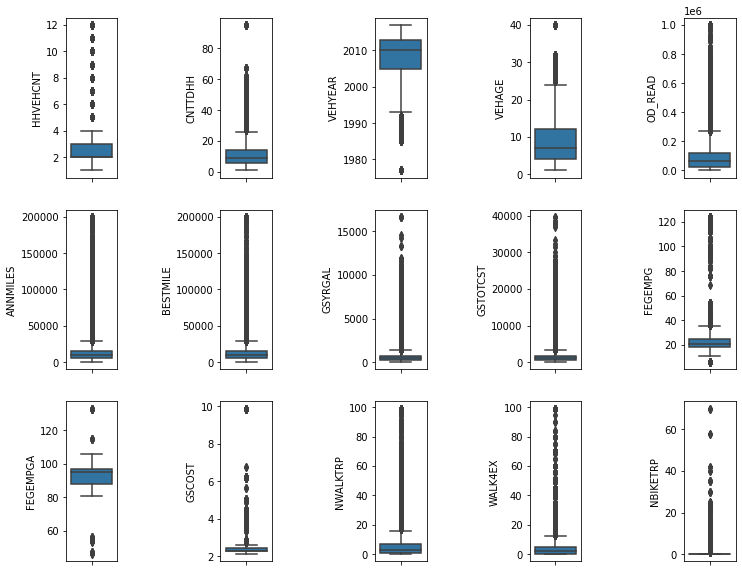

In [92]:
#Go through one by one to see if the values are possible. Look at the first 15.

selection = list(num_outlier_cases1.Name)[0:15]
fig, axes = plt.subplots(figsize=(12,10),nrows=3, ncols=5)
for i, col in enumerate(selection):
    ax = sns.boxplot(y=data2_num[col], ax=axes.flatten()[i])

fig.subplots_adjust(wspace=2)
plt.show()


Review the results one by one and state if the values are possible or not.

1. HHVEHCNT - Count of household vehicles
   - It is possible for the household vehicles to have 12 vehicles, especially if the number of household members are huge.
2. CNTTDHH - Count of household trips on travel day
   - This seems pretty huge but its not impossible.
3. VEHYEAR - Vehicle Year
   - 1970s is a possible year for vehicles.
4. VEHAGE - Age of vehicle, based on model year
   - This is also possible based on vehicle year.
5. OD_READ - Odometer Reading
   - A value as high as a million is possible.
6. ANNMILES - Self-reported annualized mile estimates
   - These values are possible
7. BESTMILE - Best estimate of annual miles
   - These values are possible
8. GSYRGAL - Annual fuel consumption in US gallons
   - These values are possible
9. GSTOTCST - Annual fuel expenditures in US dollars
   - These values are possible
10. FEGEMPG - Fuel Economy.gov EIA-Derived 55/45 fuel economy
   - These values are possible
11. FEGEMPGA - Fuel Economy.gov 55/45 alternative fuel economy
   - These values are possible
12. GSCOST - Annualized fuel cost in US cents per equivalent gallon
   - These values are possible
   - Having more than 1 young child is definitely possible since some households have 12 people.
13. NWALKTRP - Count of Walk Trips
   - **These values are possible but they are relatively high**
14. WALK4EX - Count of Walk Trips for Exercise
   - **These values are possible but they are relatively high**
15. NBIKETRP - Count of Bike Trips
   - **These values are possible but they are relatively high**

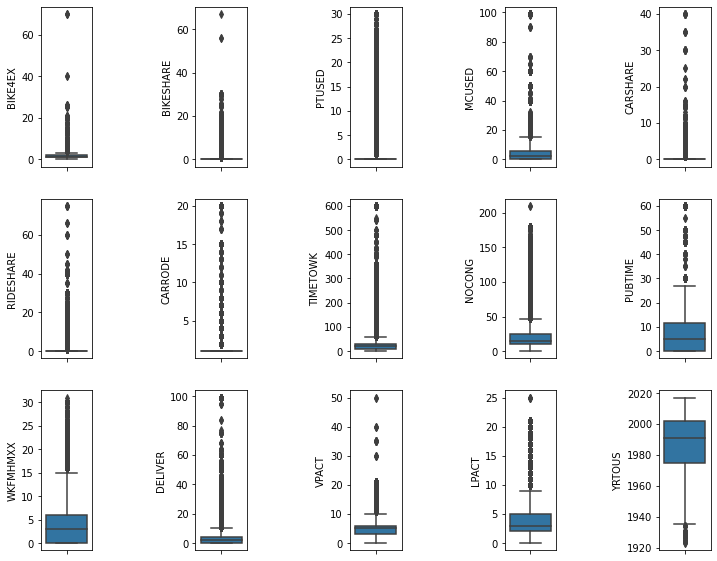

In [93]:
#Go through one by one to see if the values are possible. Look at the next 15.

selection = list(num_outlier_cases1.Name)[15:30]
fig, axes = plt.subplots(figsize=(12,10),nrows=3, ncols=5)
for i, col in enumerate(selection):
    ax = sns.boxplot(y=data2_num[col], ax=axes.flatten()[i])

fig.subplots_adjust(wspace=2)
plt.show()


16. BIKE4EX - Count of Bike Trips for Exercise
   - These values are possible
17. BIKESHARE - Count of Bike Share Program Usage
   - These values are possible
18. PTUSED - Count of Public Transit Usage
   - These values are possible
19. MCUSED - Count of Motorcycle or Moped Trips
   - These values are possible
20. CARSHARE - Count of Car Share Program Usage
   - These values are possible since it is over 30 day period
21. RIDESHARE - Count of Rideshare App Usage
   - These values are possible
22. CARRODE - Count of People in Vehicle to Work
   - These values are possible.

I was going to check all the variables that are supposedly outliers. However, I did notice that the codebook had some of the extreme values. If I check with the codebook and I see that the extreme values exist in the codebook, could I drop the variables from review?

Reference: <br>
U.S. Department of Transportation, Federal Highway Administration, 2017 National Household Travel Survey. URL: http://nhts.ornl.gov.